Визуализация активации в свёрточных нейронных сетях на примере распознавания чисел из датасета MNIST.
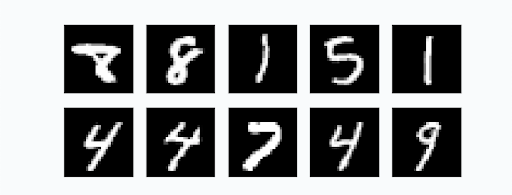

Визуализируем активации с помощью утилиты `keract`.

In [ ]:
!pip install keract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import activations
from keract import get_activations, display_activations

In [ ]:
# Различные константы
IMG_WIDTH, IMG_HEIGHT = 28, 28
BATCH_SIZE = 250
EPOCHS = 30
NUM_CLASSES = 10
VALIDATION_SPLIT = 0.2
VERBOSITY = 1

In [ ]:
# Загружаем датасет MNIST.
(input_train, target_train), (input_test, target_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(target_train[0])

5


In [ ]:
print(input_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
print(type(input_train))

<class 'numpy.ndarray'>


In [ ]:
print(input_train.shape)

(60000, 28, 28)


In [ ]:
# Подготавливаем данные.
input_train = input_train.reshape(input_train.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
input_test = input_test.reshape(input_test.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
input_shape = (IMG_WIDTH, IMG_HEIGHT, 1)

In [ ]:
print(input_train.shape)

(60000, 28, 28, 1)


In [ ]:
print(input_train[0])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


In [ ]:
# Нормализуем данные (0-255 -> 0-1.0).
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')
input_train = input_train / 255
input_test = input_test / 255

target_train = tensorflow.keras.utils.to_categorical(target_train, NUM_CLASSES)
target_test = tensorflow.keras.utils.to_categorical(target_test, NUM_CLASSES)

In [ ]:
print(target_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print(type(target_train))

<class 'numpy.ndarray'>


In [ ]:
# Либо загружаем обученную модель.
#model = load_model("cnn_mnist_classification")

In [ ]:
# Либо создаём модель.
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
# И обучаем её.
model.compile(
    loss=tensorflow.keras.losses.categorical_crossentropy,
    optimizer=tensorflow.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# callback для сохранения результатов обучения в формате Keras (h5) после каждой эпохи обучения.
callbacks = [
    tensorflow.keras.callbacks.ModelCheckpoint("drive/MyDrive/3_classification_keras_mnist_deep_dive/cnn_mnist_classification_epochs/epoch_{epoch}.h5")
]

model_history = model.fit(
    input_train,
    target_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=VERBOSITY,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/30
192/192 [==============================] - 3s 6ms/step - loss: 0.3074 - accuracy: 0.9153 - val_loss: 0.1095 - val_accuracy: 0.9692
Epoch 2/30
192/192 [==============================] - 1s 5ms/step - loss: 0.0903 - accuracy: 0.9725 - val_loss: 0.0853 - val_accuracy: 0.9747
Epoch 3/30
192/192 [==============================] - 1s 5ms/step - loss: 0.0616 - accuracy: 0.9813 - val_loss: 0.0614 - val_accuracy: 0.9810
Epoch 4/30
192/192 [==============================] - 1s 5ms/step - loss: 0.0456 - accuracy: 0.9860 - val_loss: 0.0595 - val_accuracy: 0.9810
Epoch 5/30
192/192 [==============================] - 1s 5ms/step - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.0506 - val_accuracy: 0.9851
Epoch 6/30
192/192 [==============================] - 1s 5ms/step - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0488 - val_accuracy: 0.9861
Epoch 7/30
192/192 [==============================] - 1s 5ms/step - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.0468 - val_accuracy: 0.9865
Epoch 

In [ ]:
print(model_history.history)

{'loss': [0.6579945683479309, 0.1959034651517868, 0.13945552706718445, 0.1108054593205452, 0.0929049476981163, 0.07998102903366089, 0.07243718206882477, 0.06657382845878601, 0.06087968498468399, 0.056680869311094284, 0.05183335766196251, 0.049073923379182816, 0.0462794192135334, 0.04230612516403198, 0.03963832929730415], 'accuracy': [0.8104583621025085, 0.9408541917800903, 0.9581249952316284, 0.9658958315849304, 0.9715625047683716, 0.9749791622161865, 0.9779166579246521, 0.9791874885559082, 0.9806249737739563, 0.9825000166893005, 0.9839583039283752, 0.984499990940094, 0.9854166507720947, 0.9867708086967468, 0.9874791502952576], 'val_loss': [0.2367487996816635, 0.16117636859416962, 0.12838983535766602, 0.10560499876737595, 0.09807587414979935, 0.08517178148031235, 0.08530636131763458, 0.07473739981651306, 0.07147236913442612, 0.07238121330738068, 0.07927882671356201, 0.06593756377696991, 0.06410059332847595, 0.06418025493621826, 0.06849458068609238], 'val_accuracy': [0.925000011920929, 

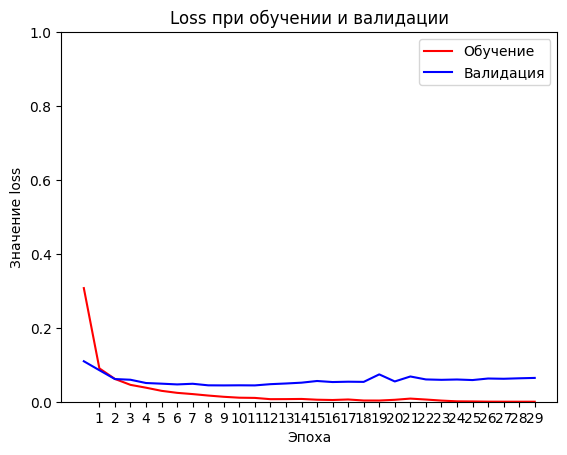

In [ ]:
import matplotlib.pyplot as plt

loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]

plt.figure()
plt.plot(model_history.epoch, loss, "r", label="Обучение")
plt.plot(model_history.epoch, val_loss, "b", label="Валидация")
plt.title("Loss при обучении и валидации")
plt.xlabel("Эпоха")
plt.xticks(range(1, EPOCHS))
plt.ylabel("Значение loss")
plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
model.load_weights('drive/MyDrive/3_classification_keras_mnist_deep_dive/cnn_mnist_classification_epochs/epoch_18.h5')

In [ ]:
# Сохраняем модель.
model.save("drive/MyDrive/3_classification_keras_mnist_deep_dive/cnn_mnist_classification")

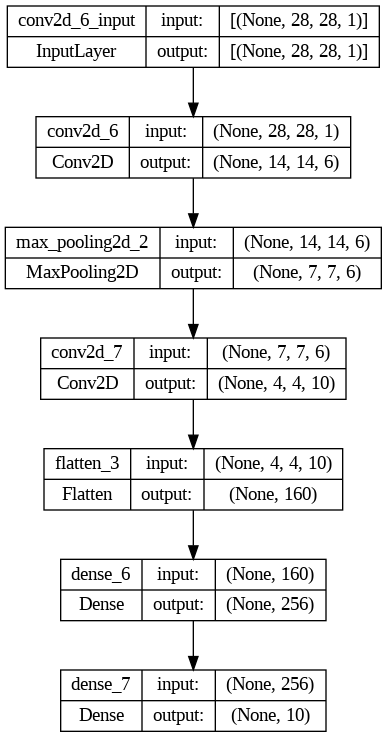

In [ ]:
# Визуализируем модель.
plot_model(model, show_shapes = True)

conv2d_10_input (1, 28, 28, 1) 


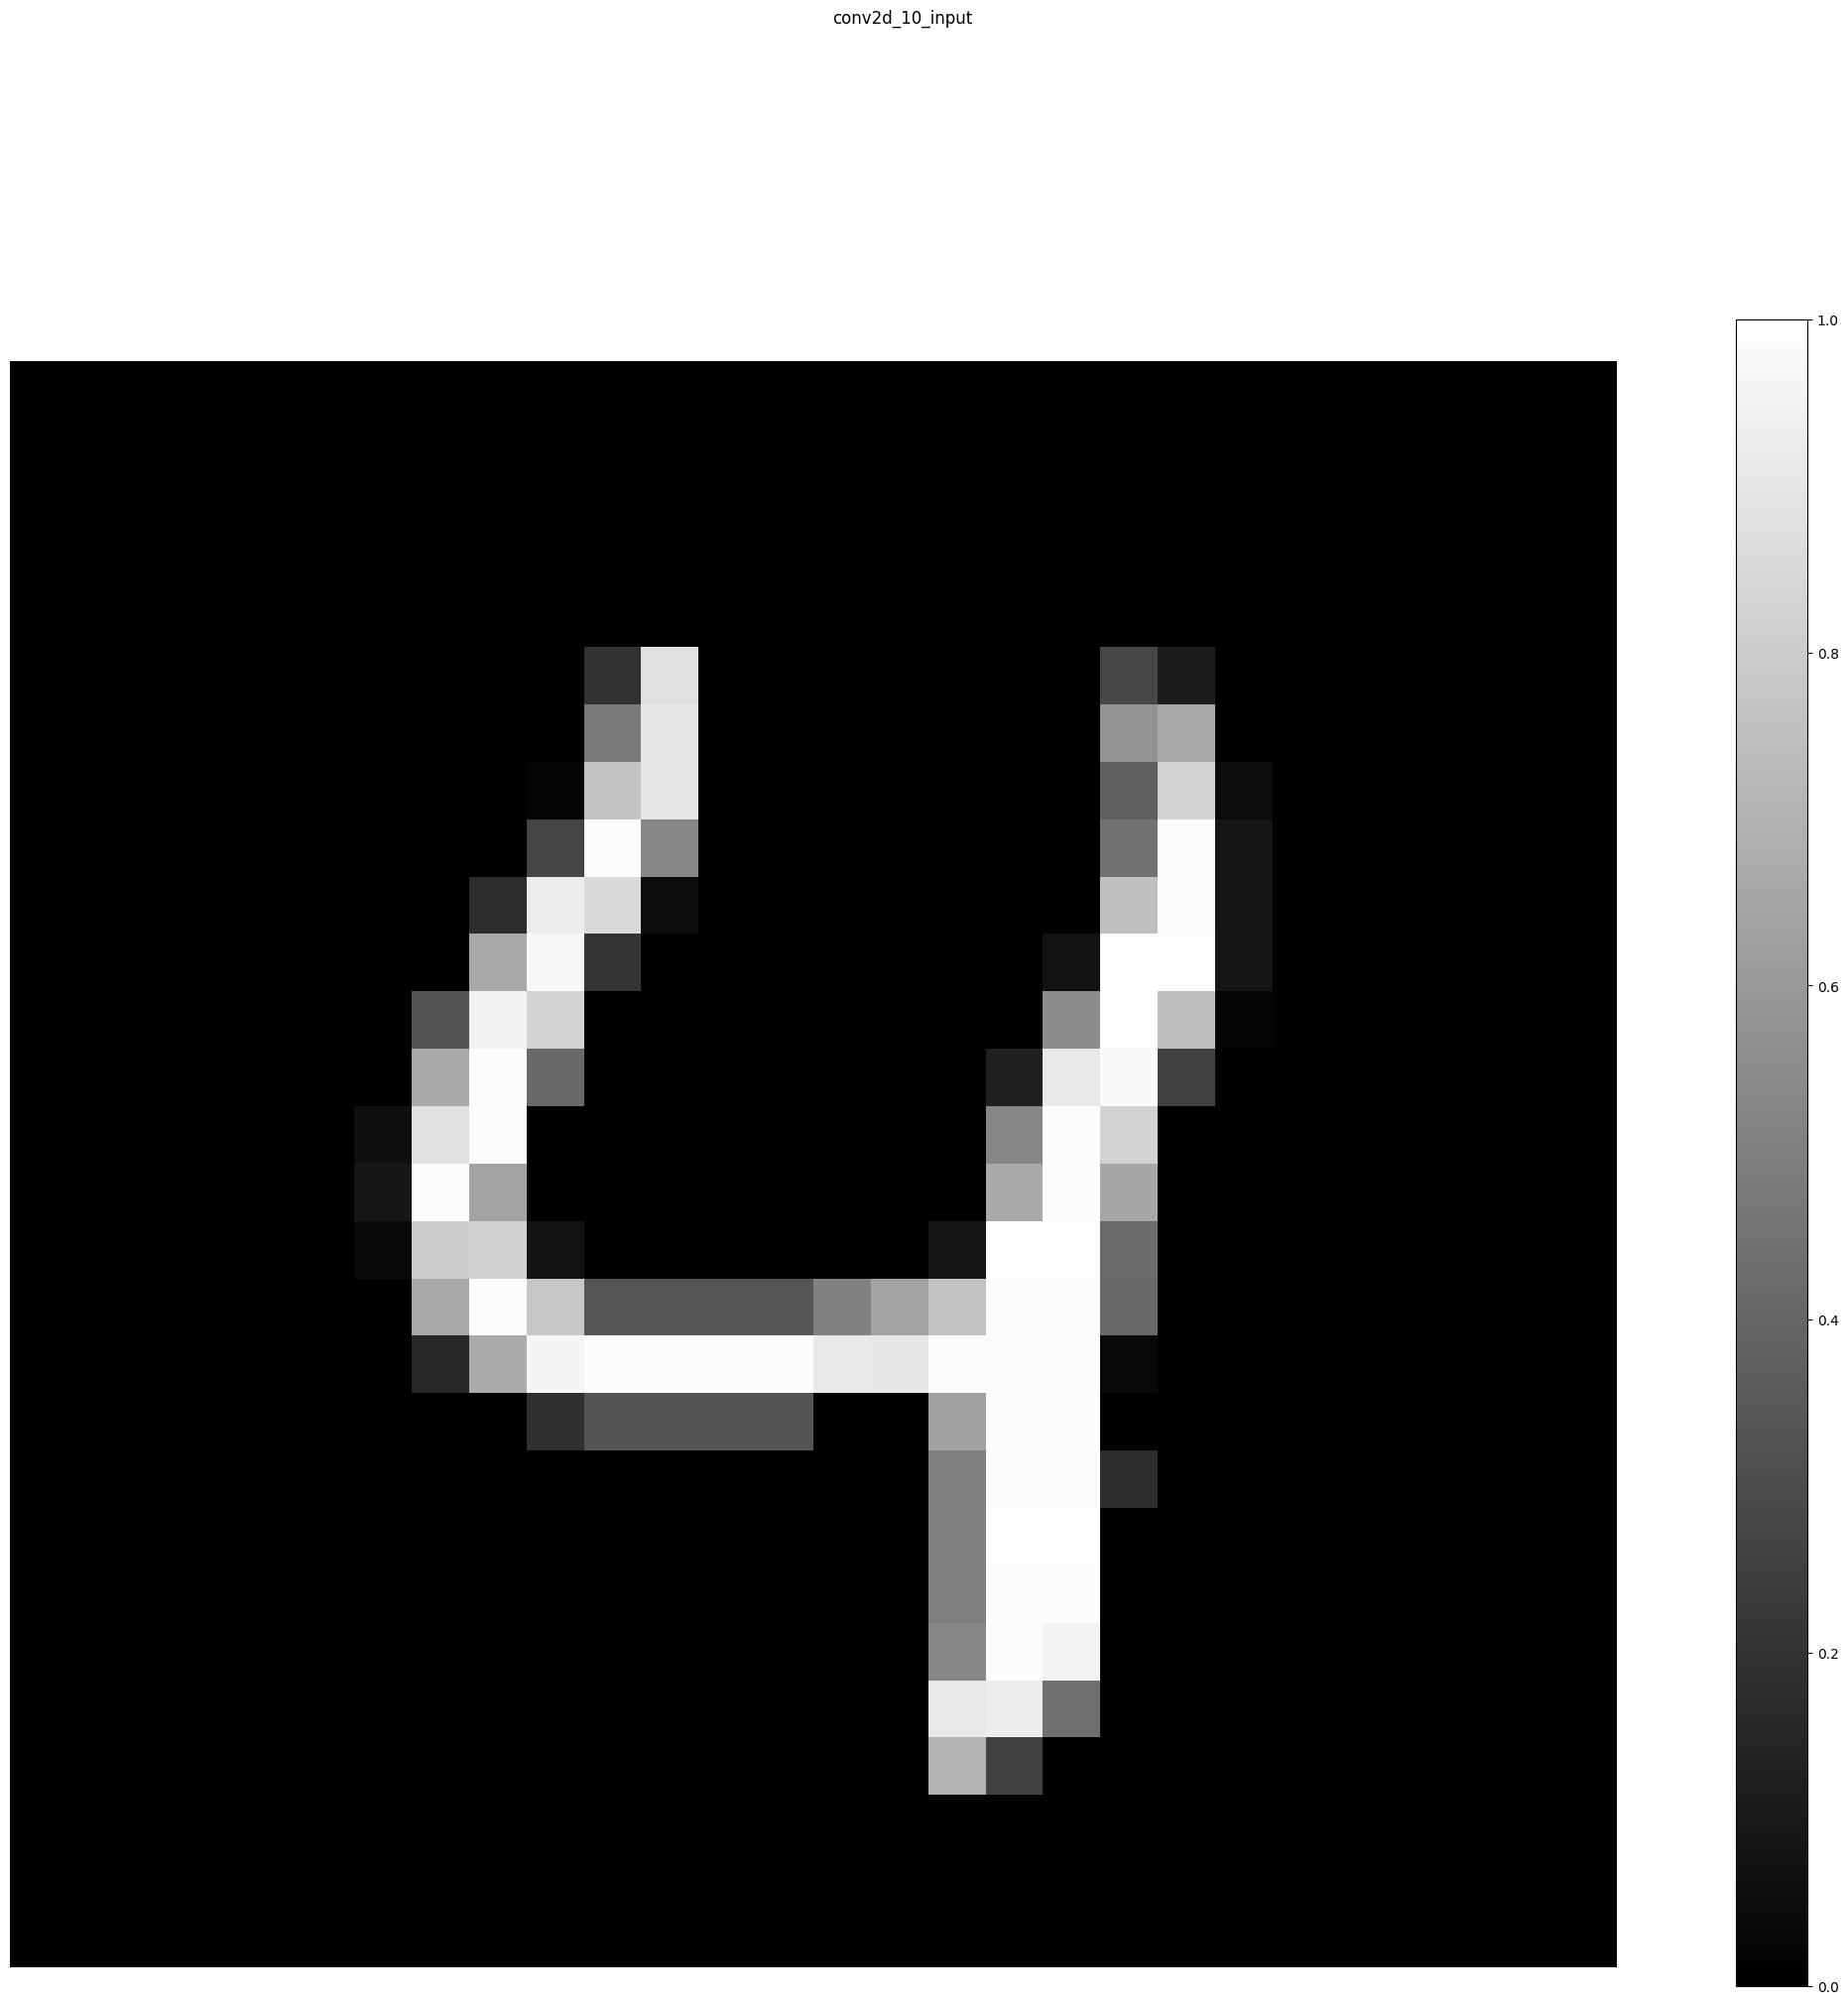

conv2d_10 (1, 28, 28, 6) 


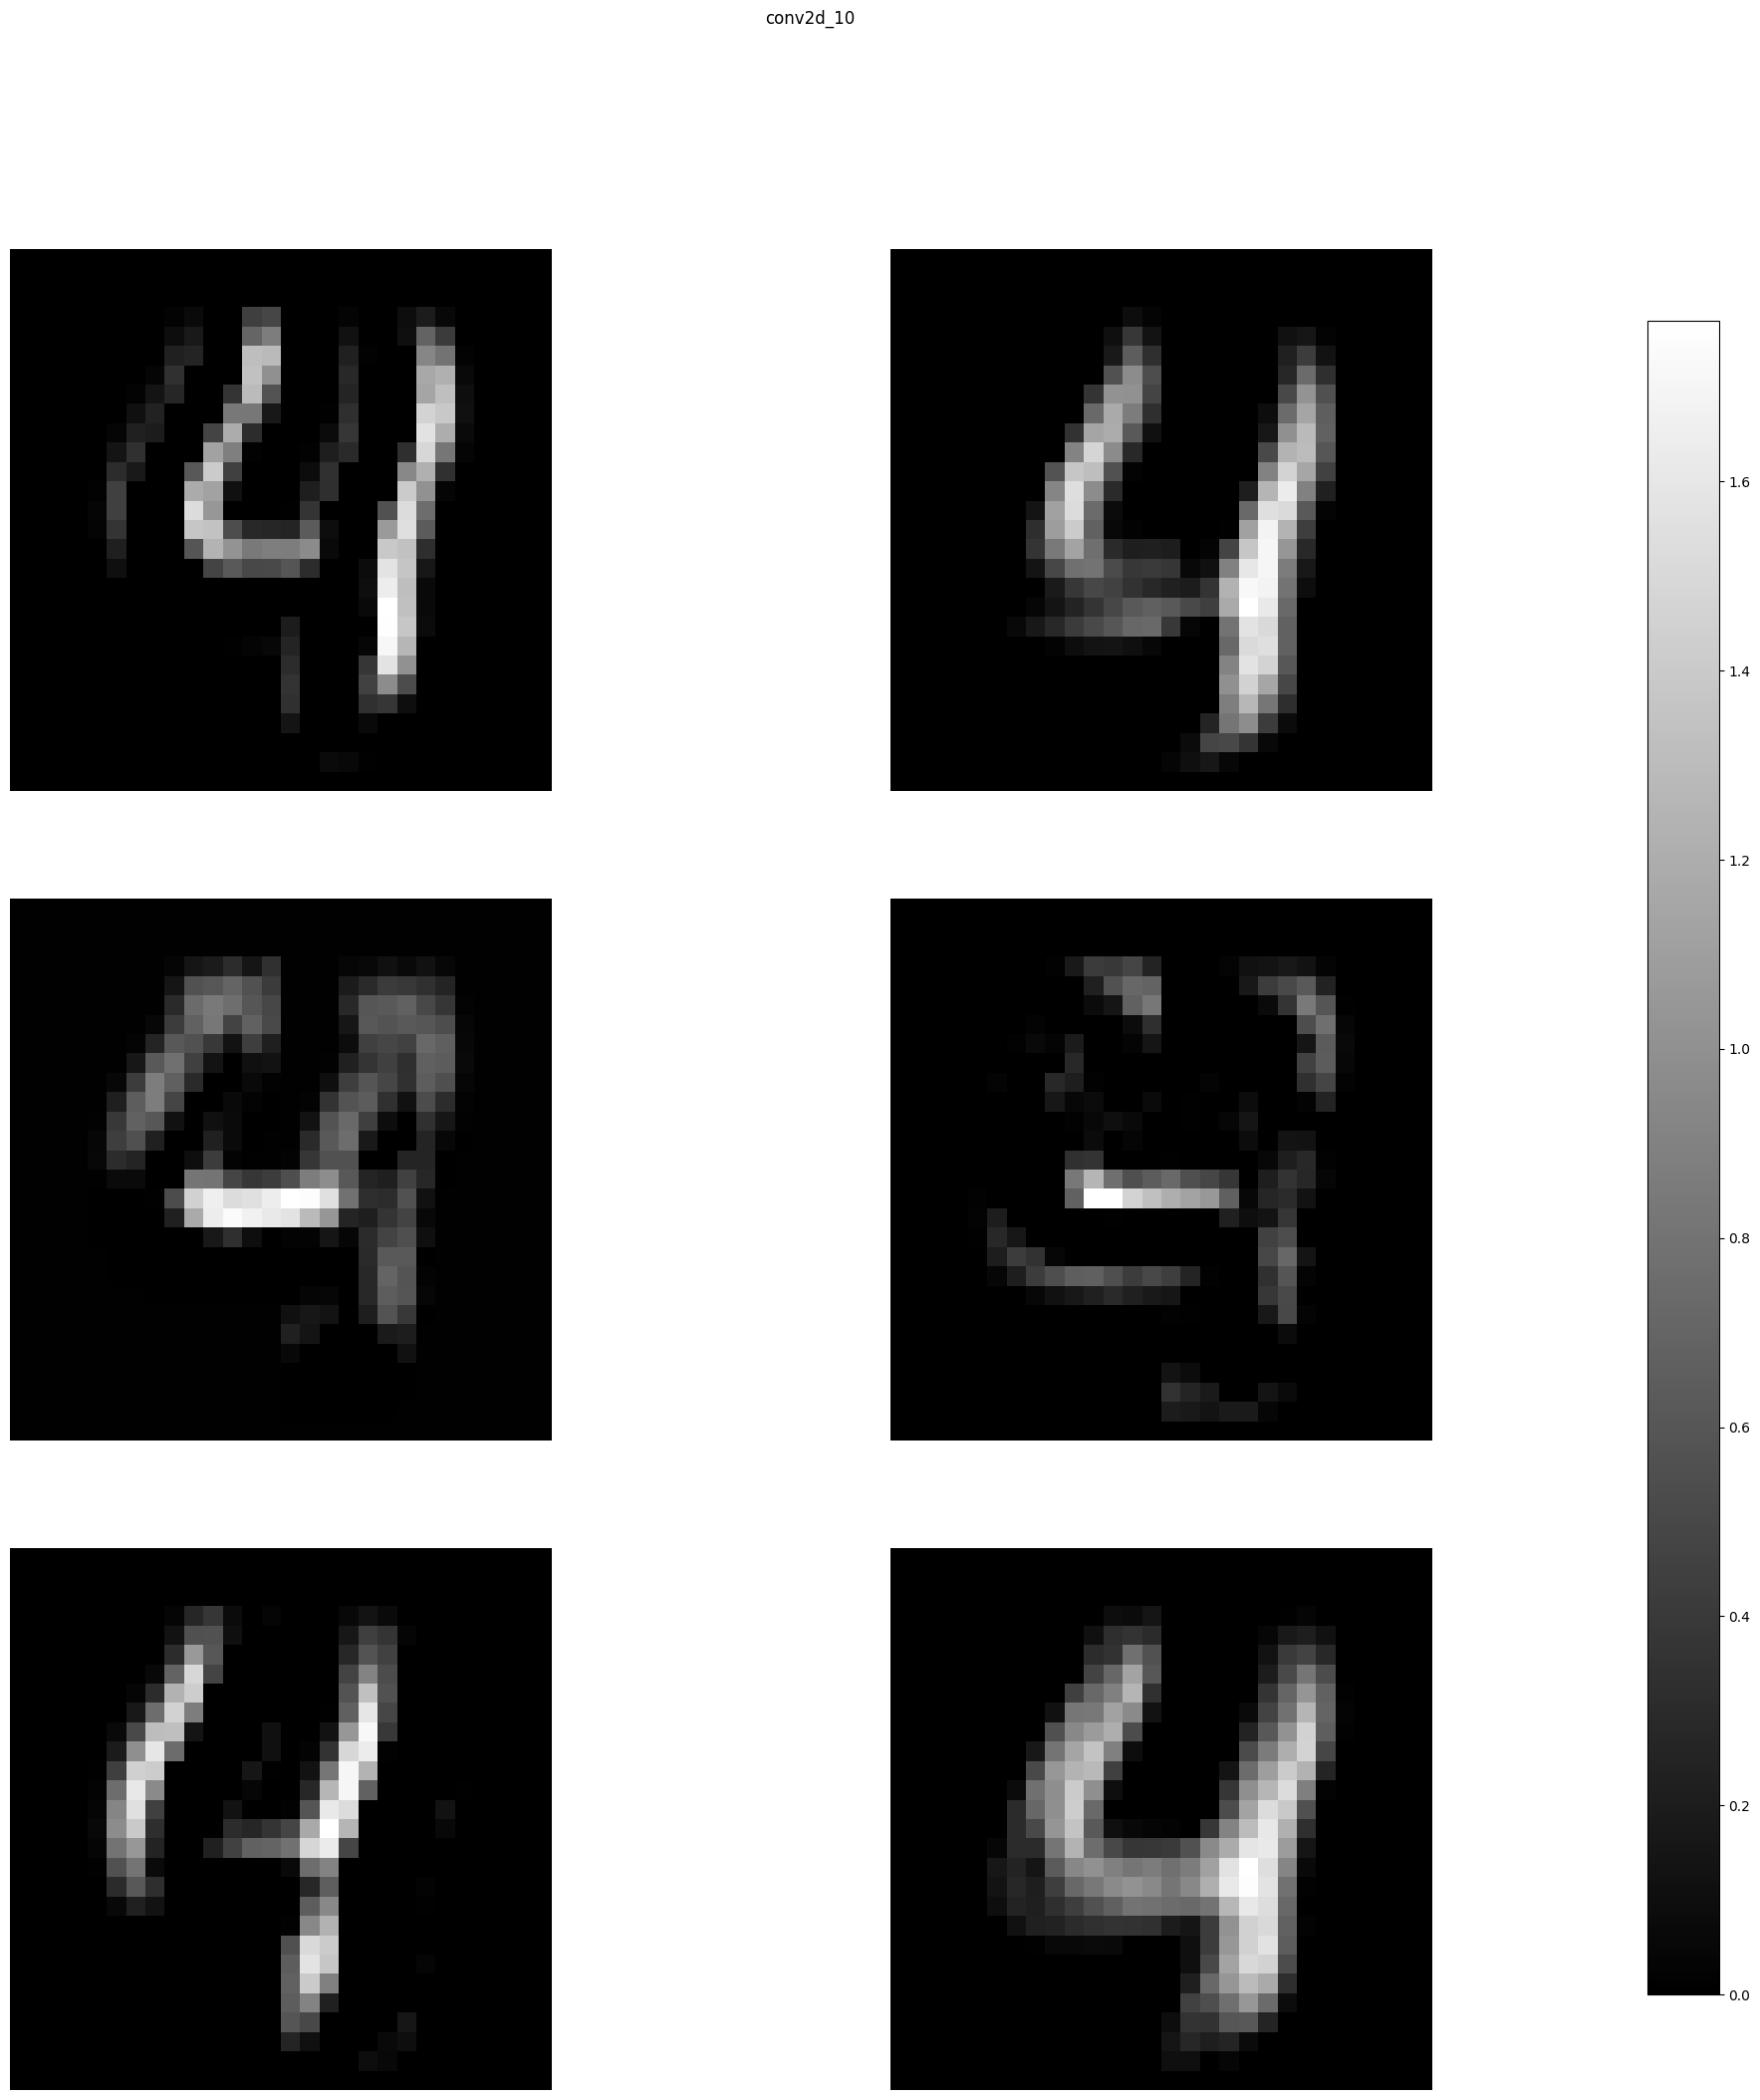

max_pooling2d_4 (1, 14, 14, 6) 


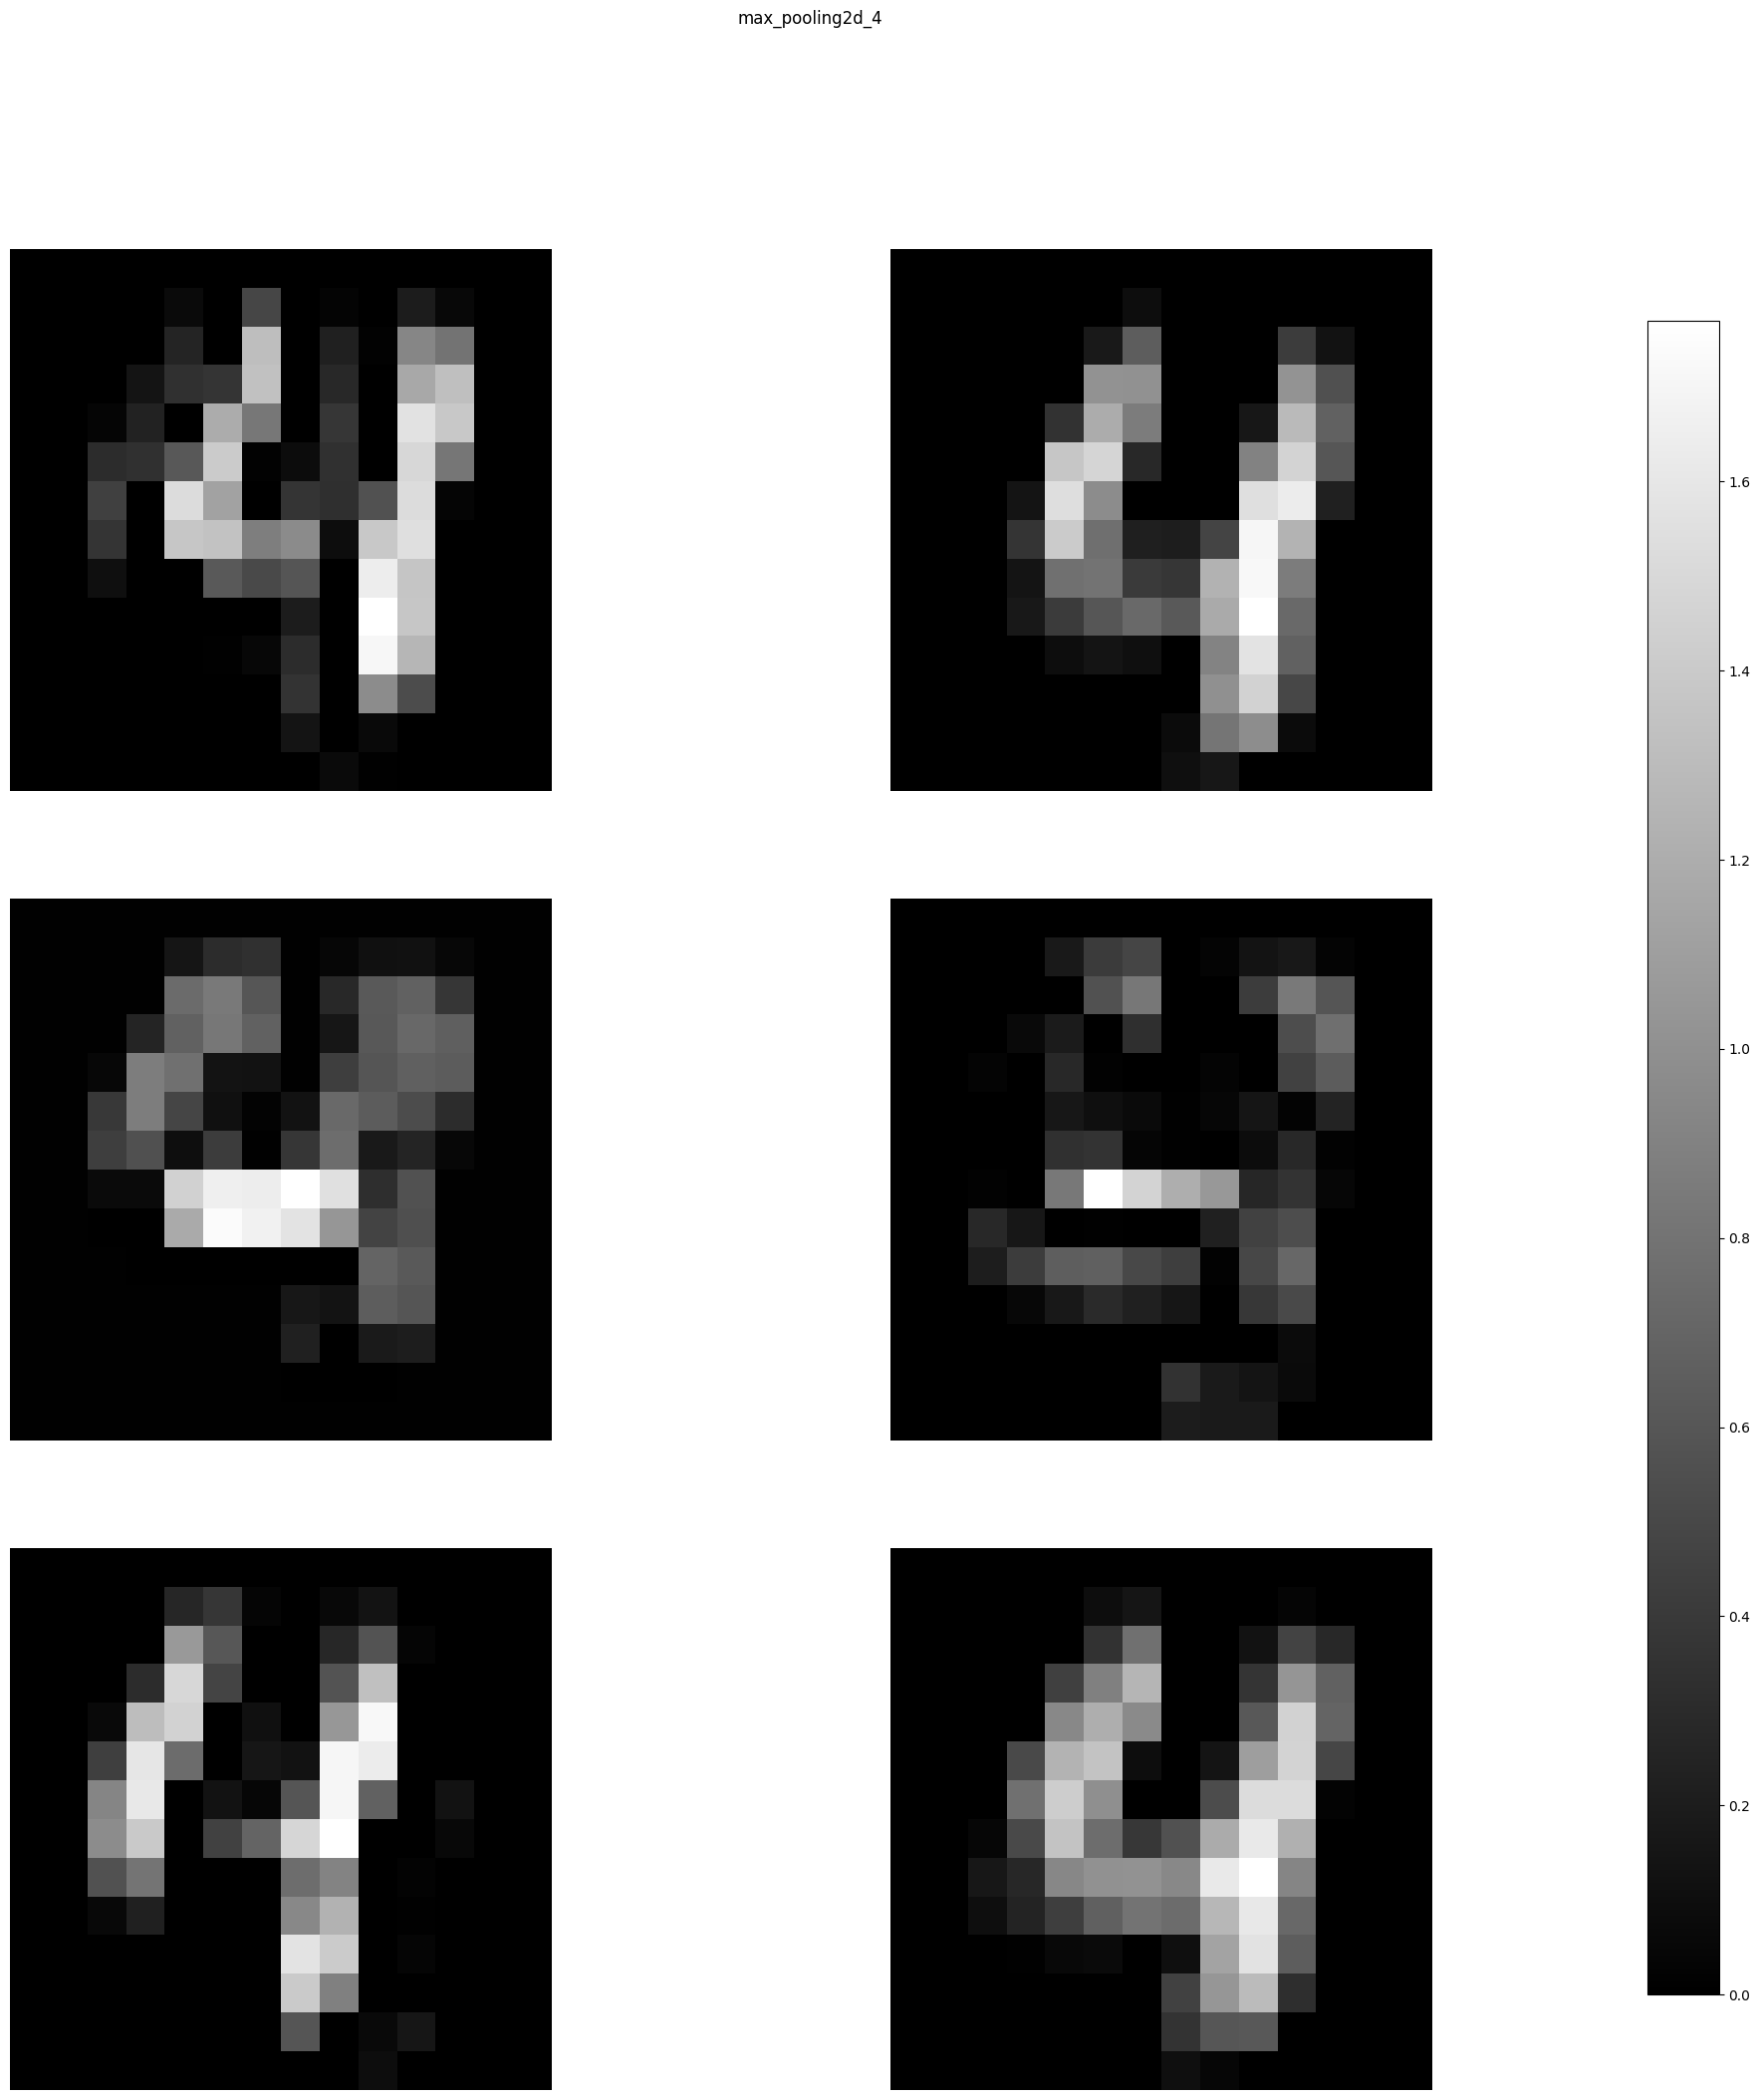

conv2d_11 (1, 14, 14, 10) 


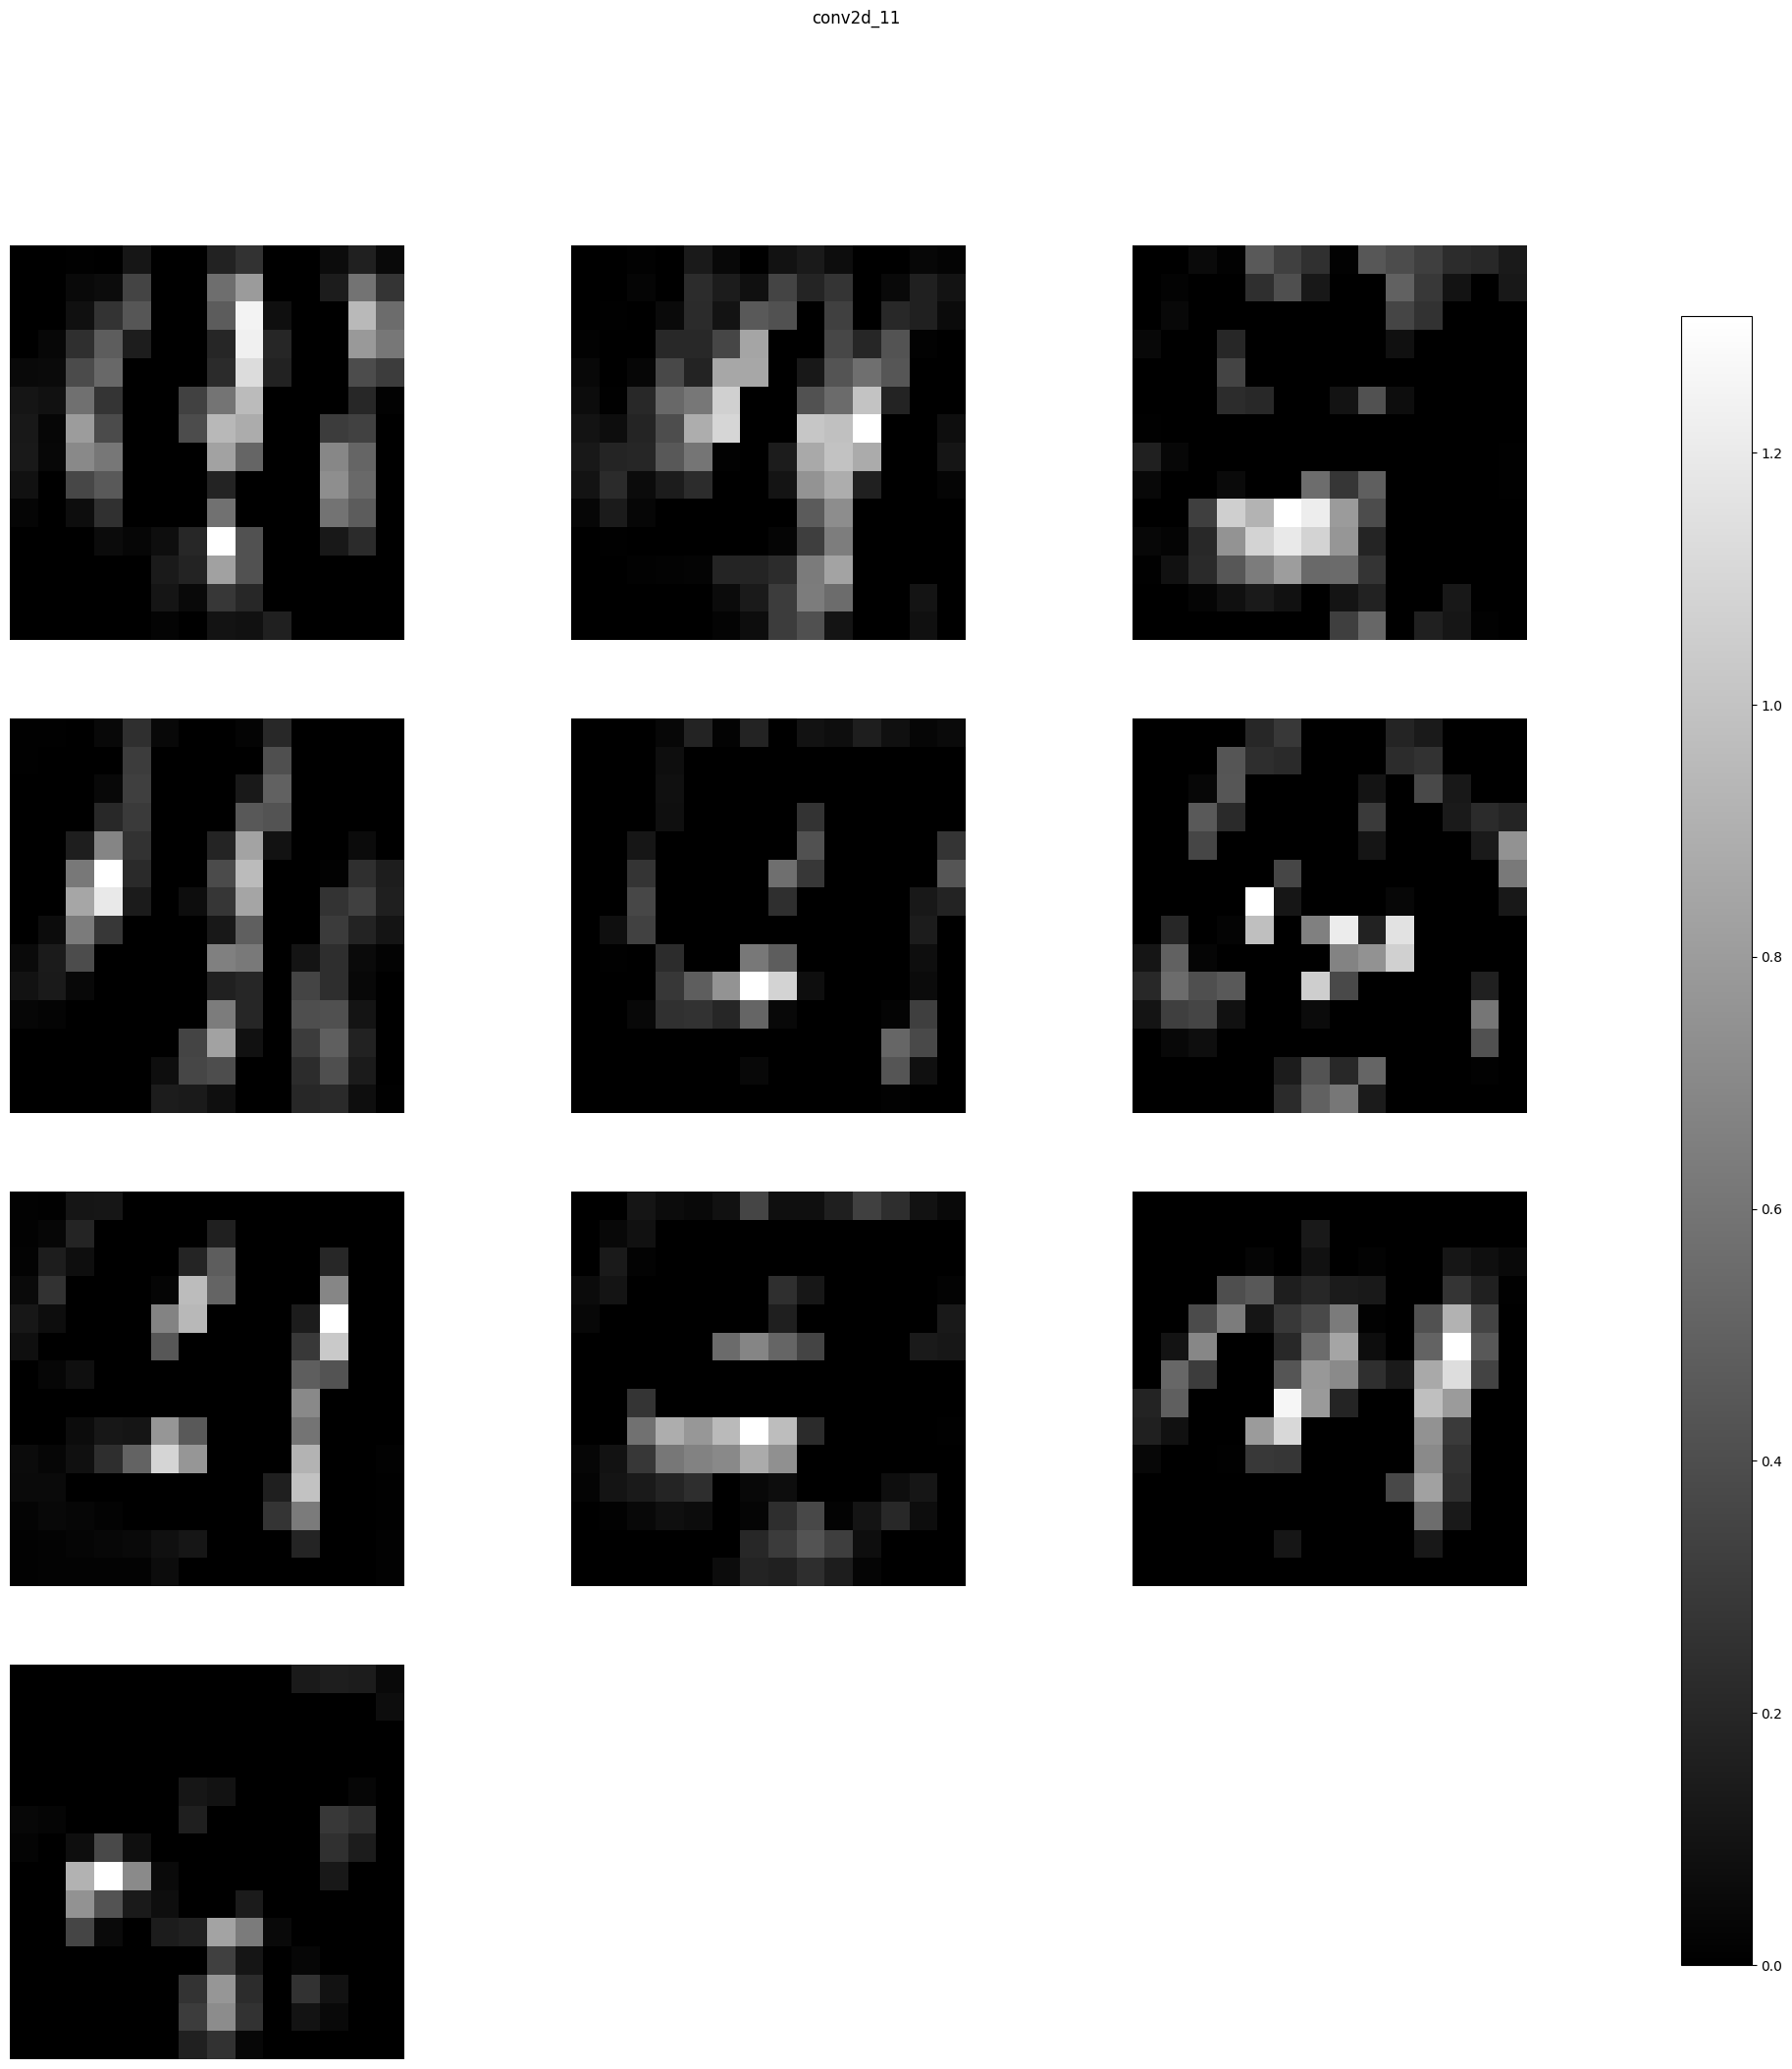

flatten_5 (1, 1960) 


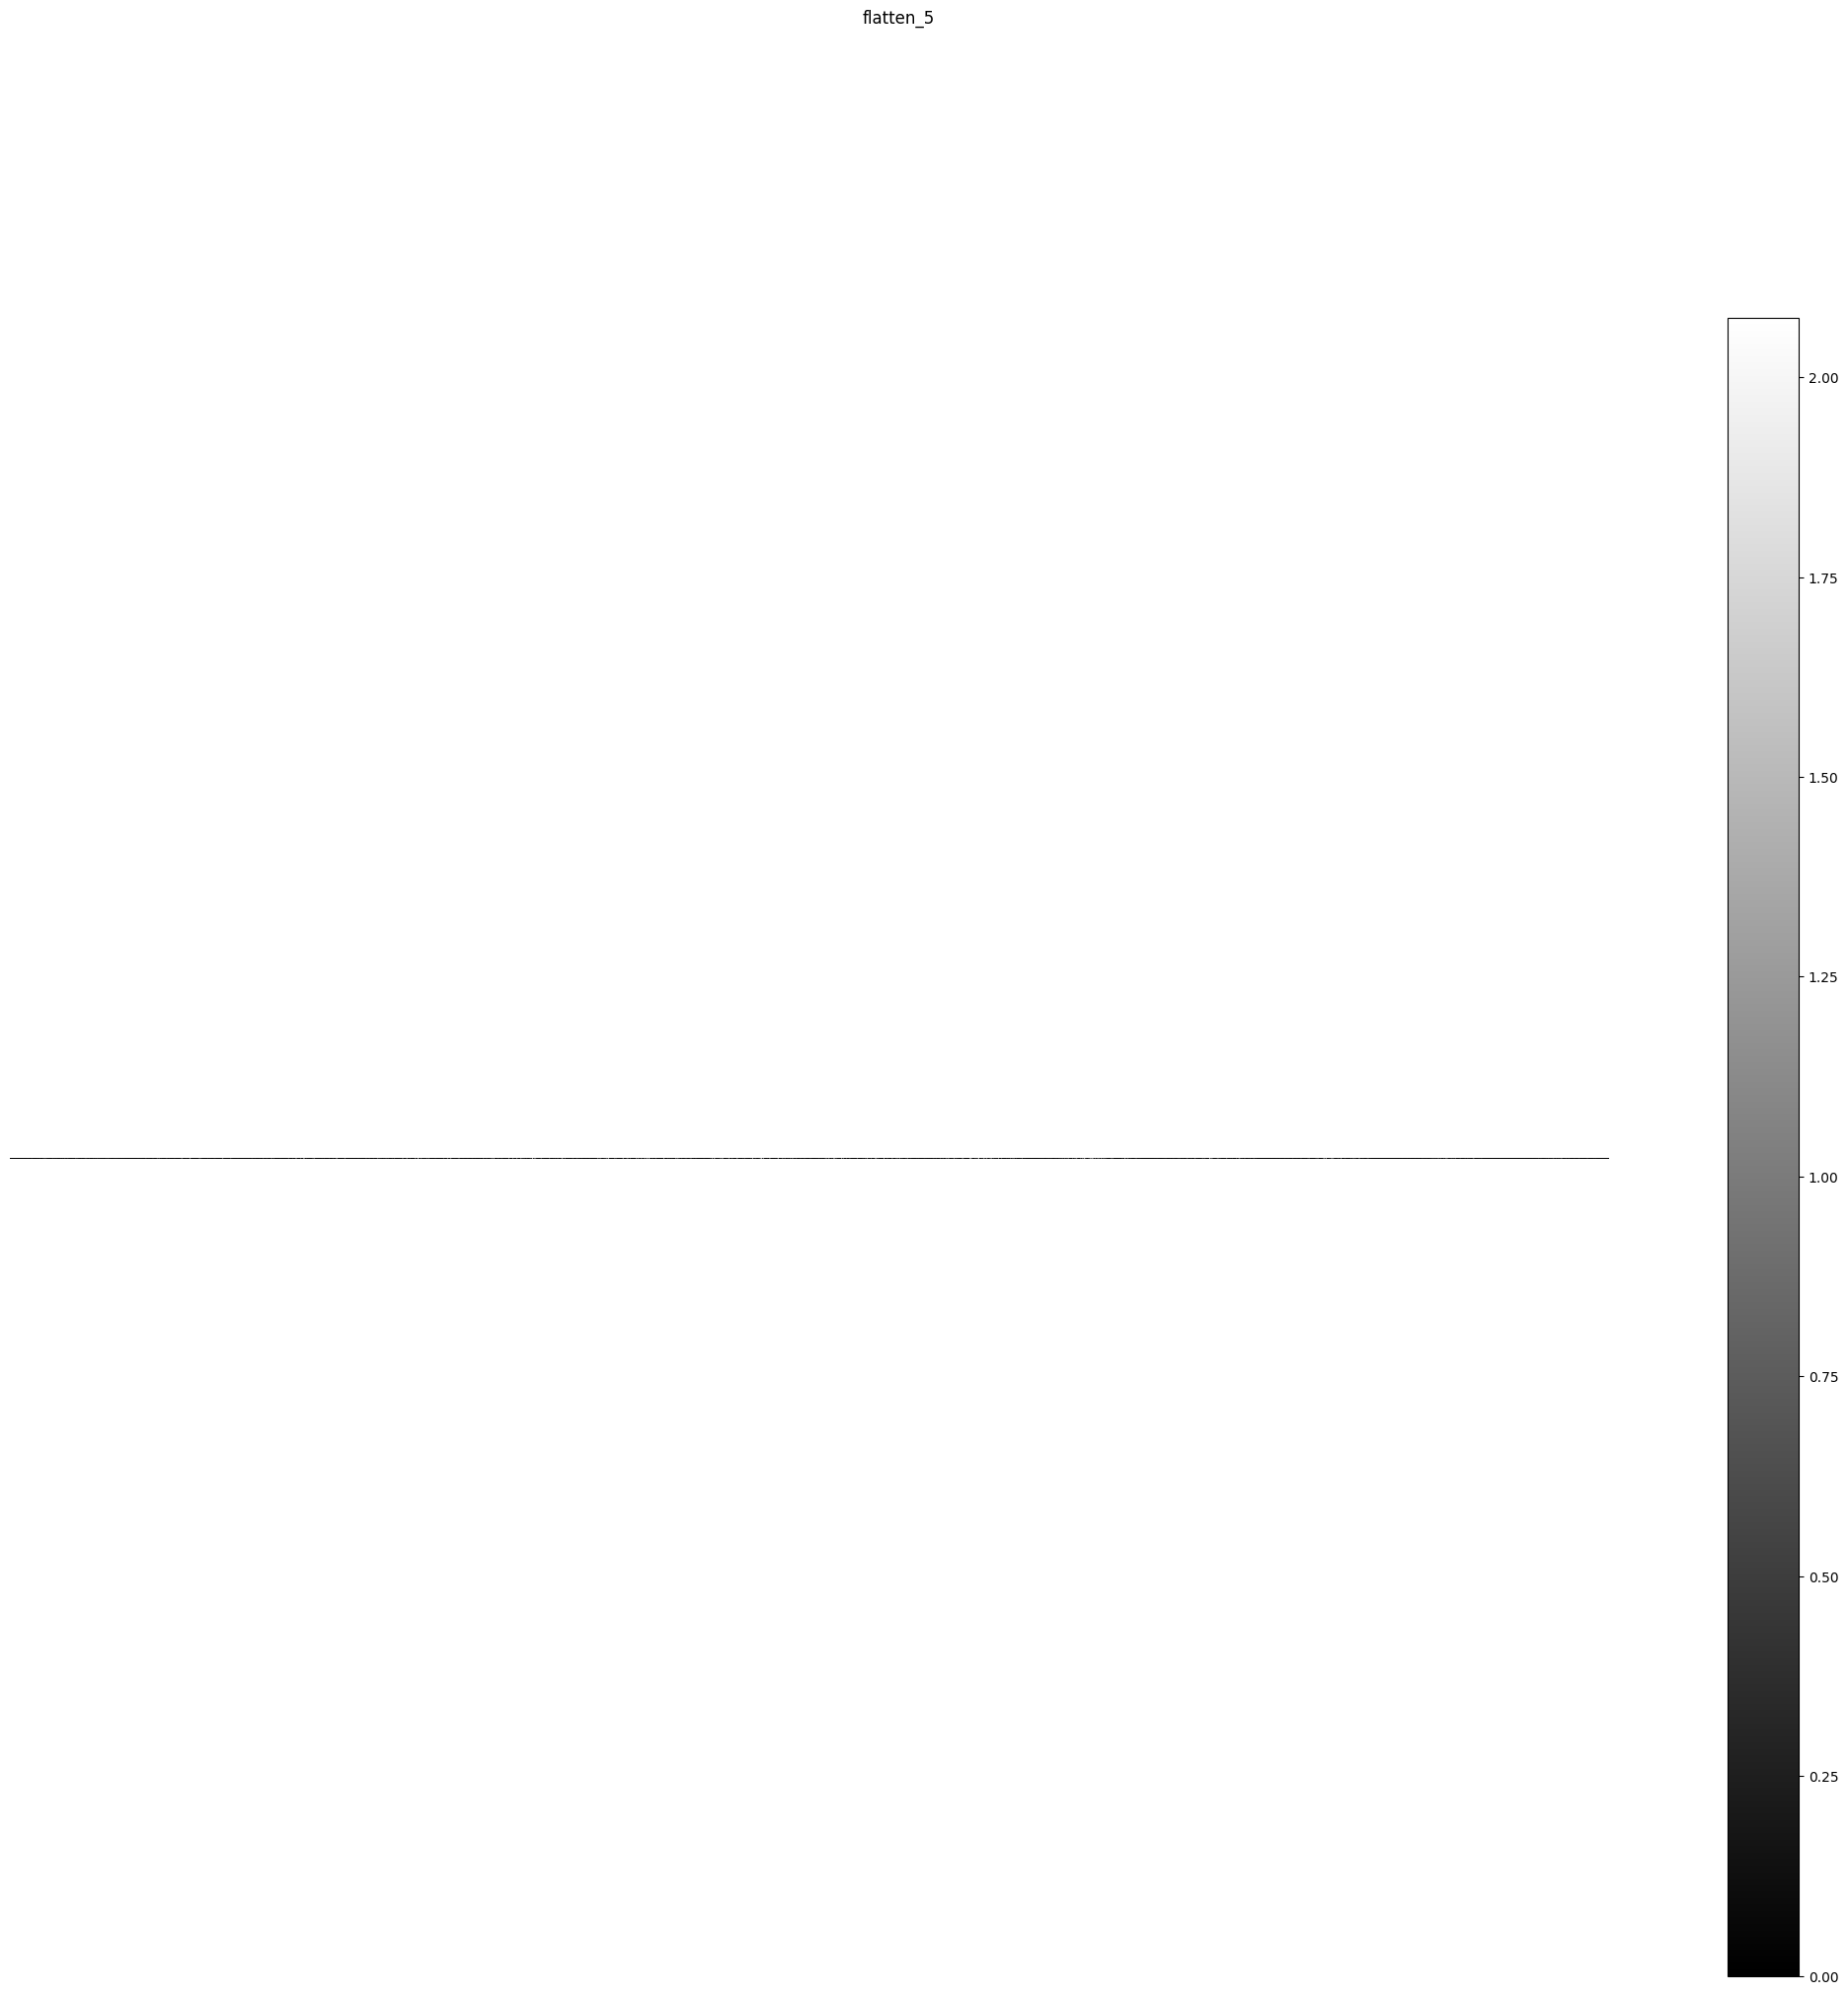

dense_10 (1, 256) 


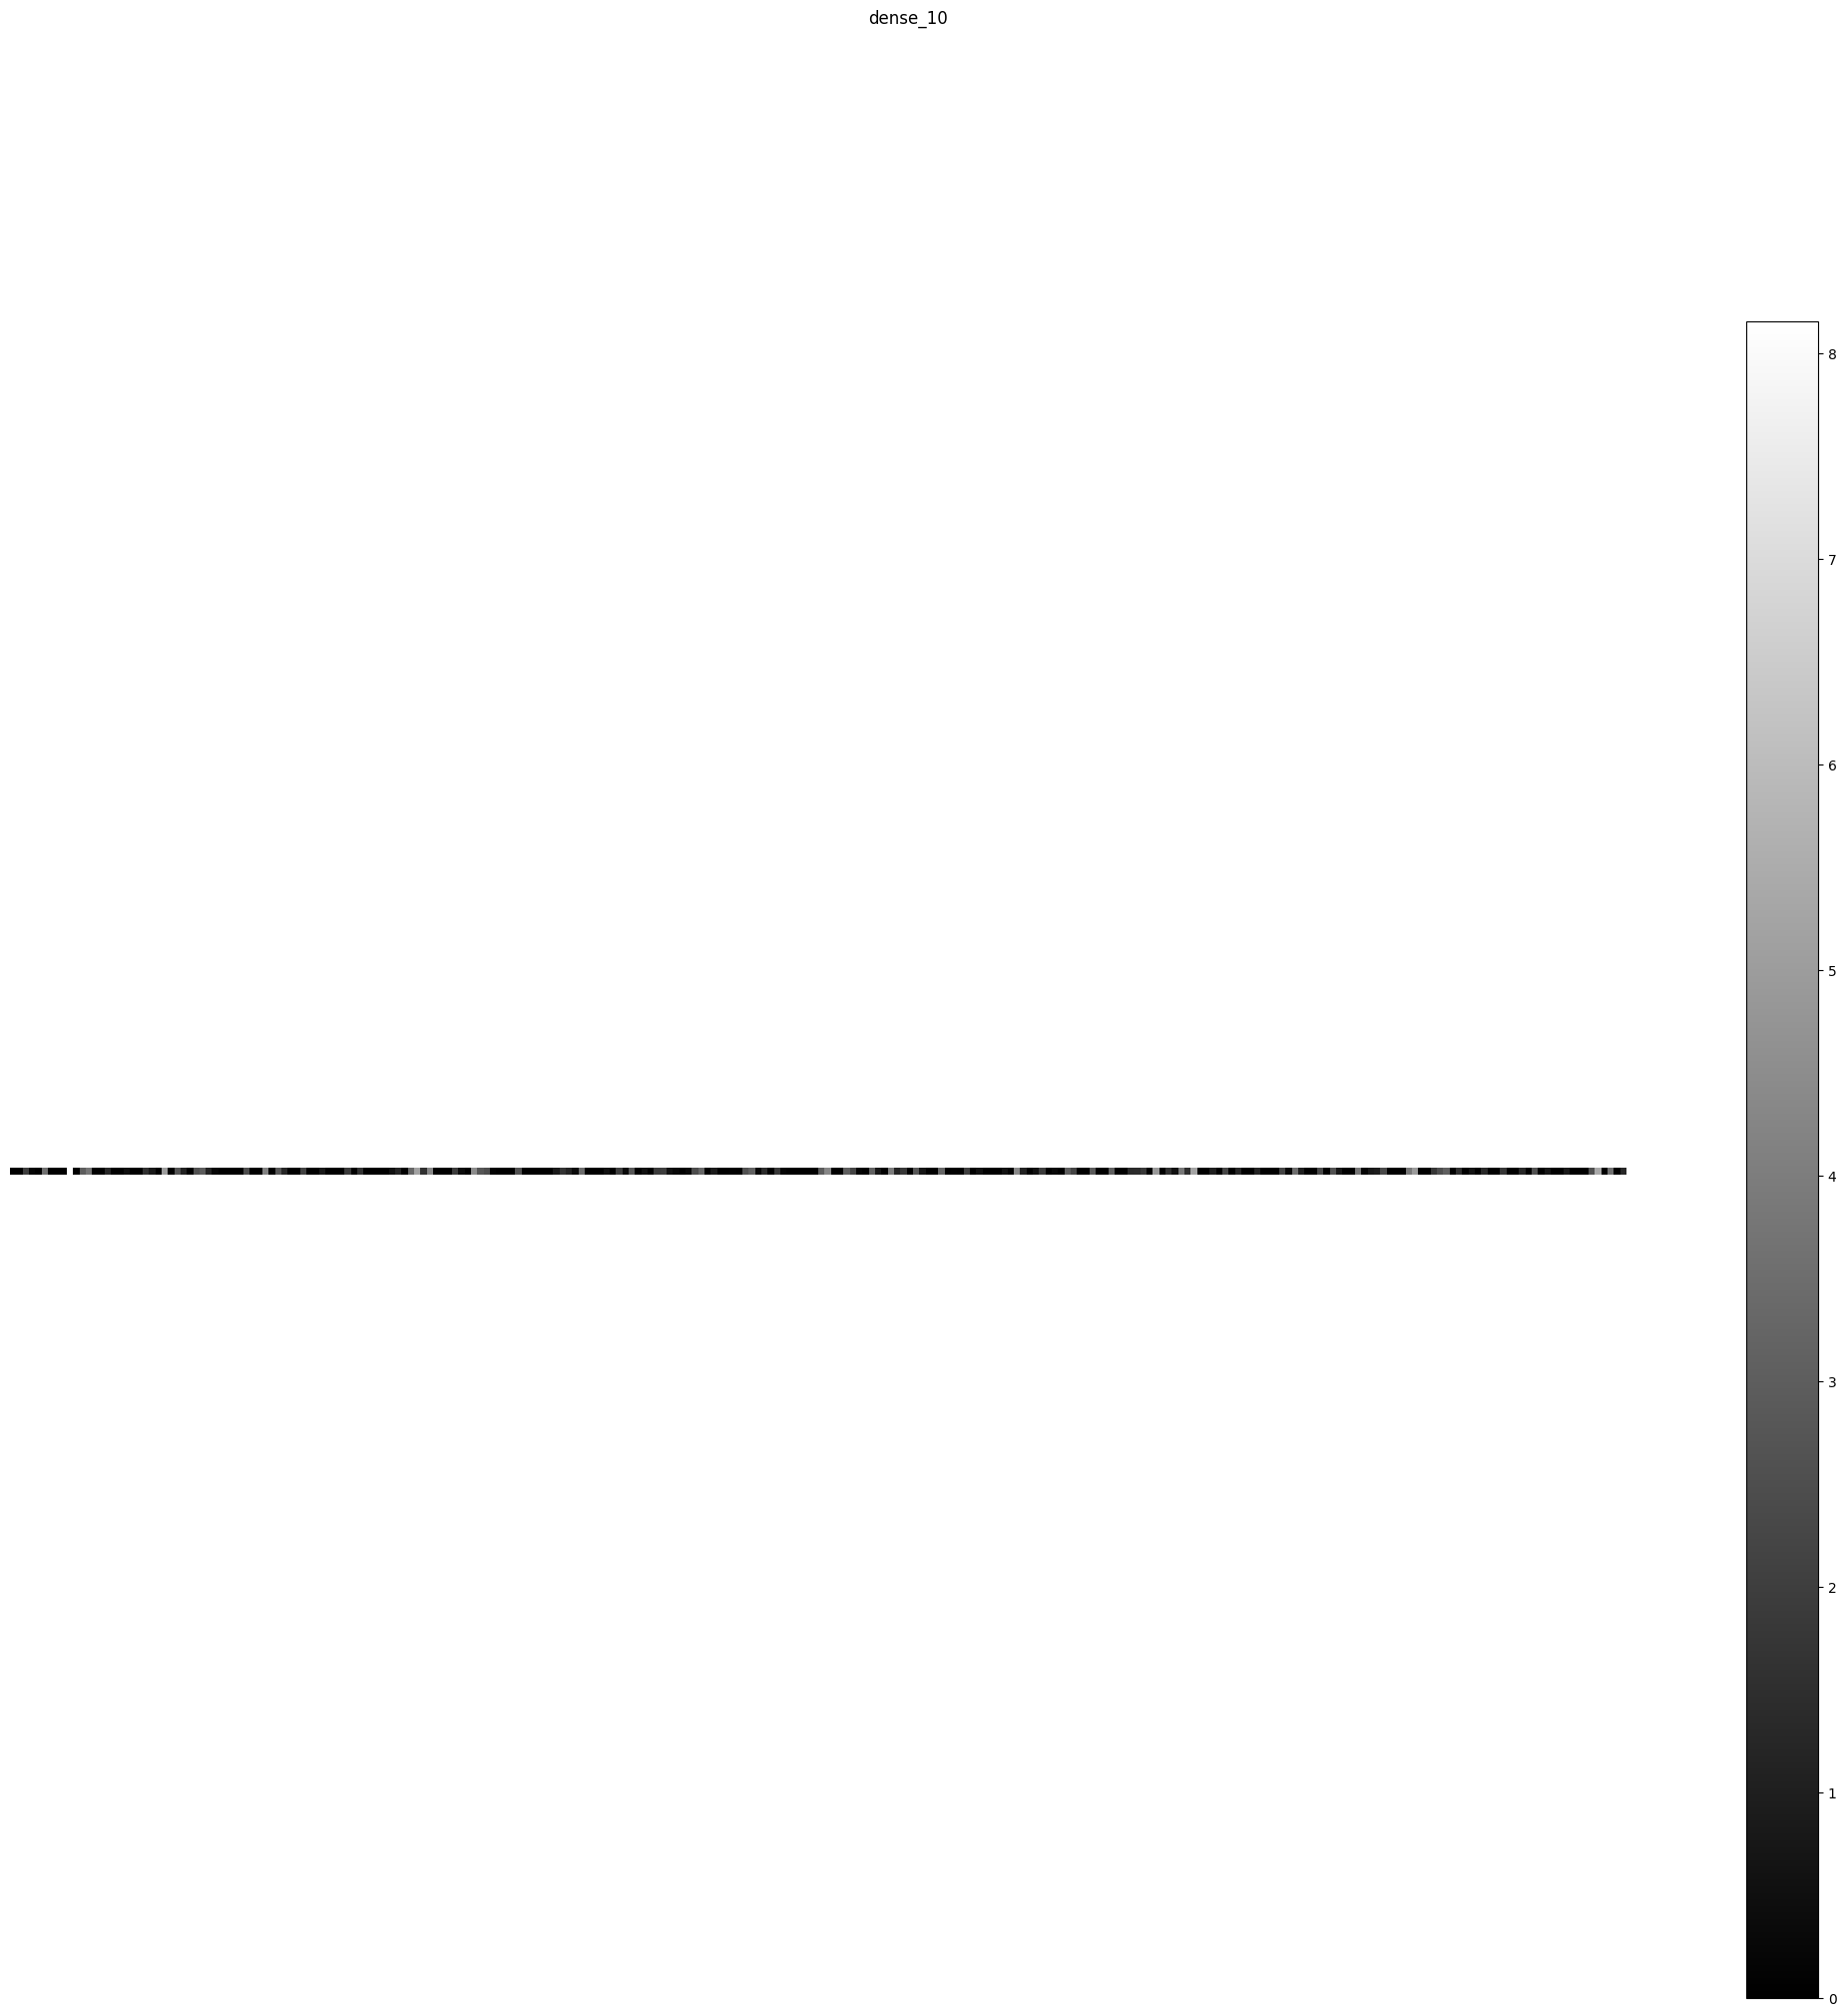

dense_11 (1, 10) 


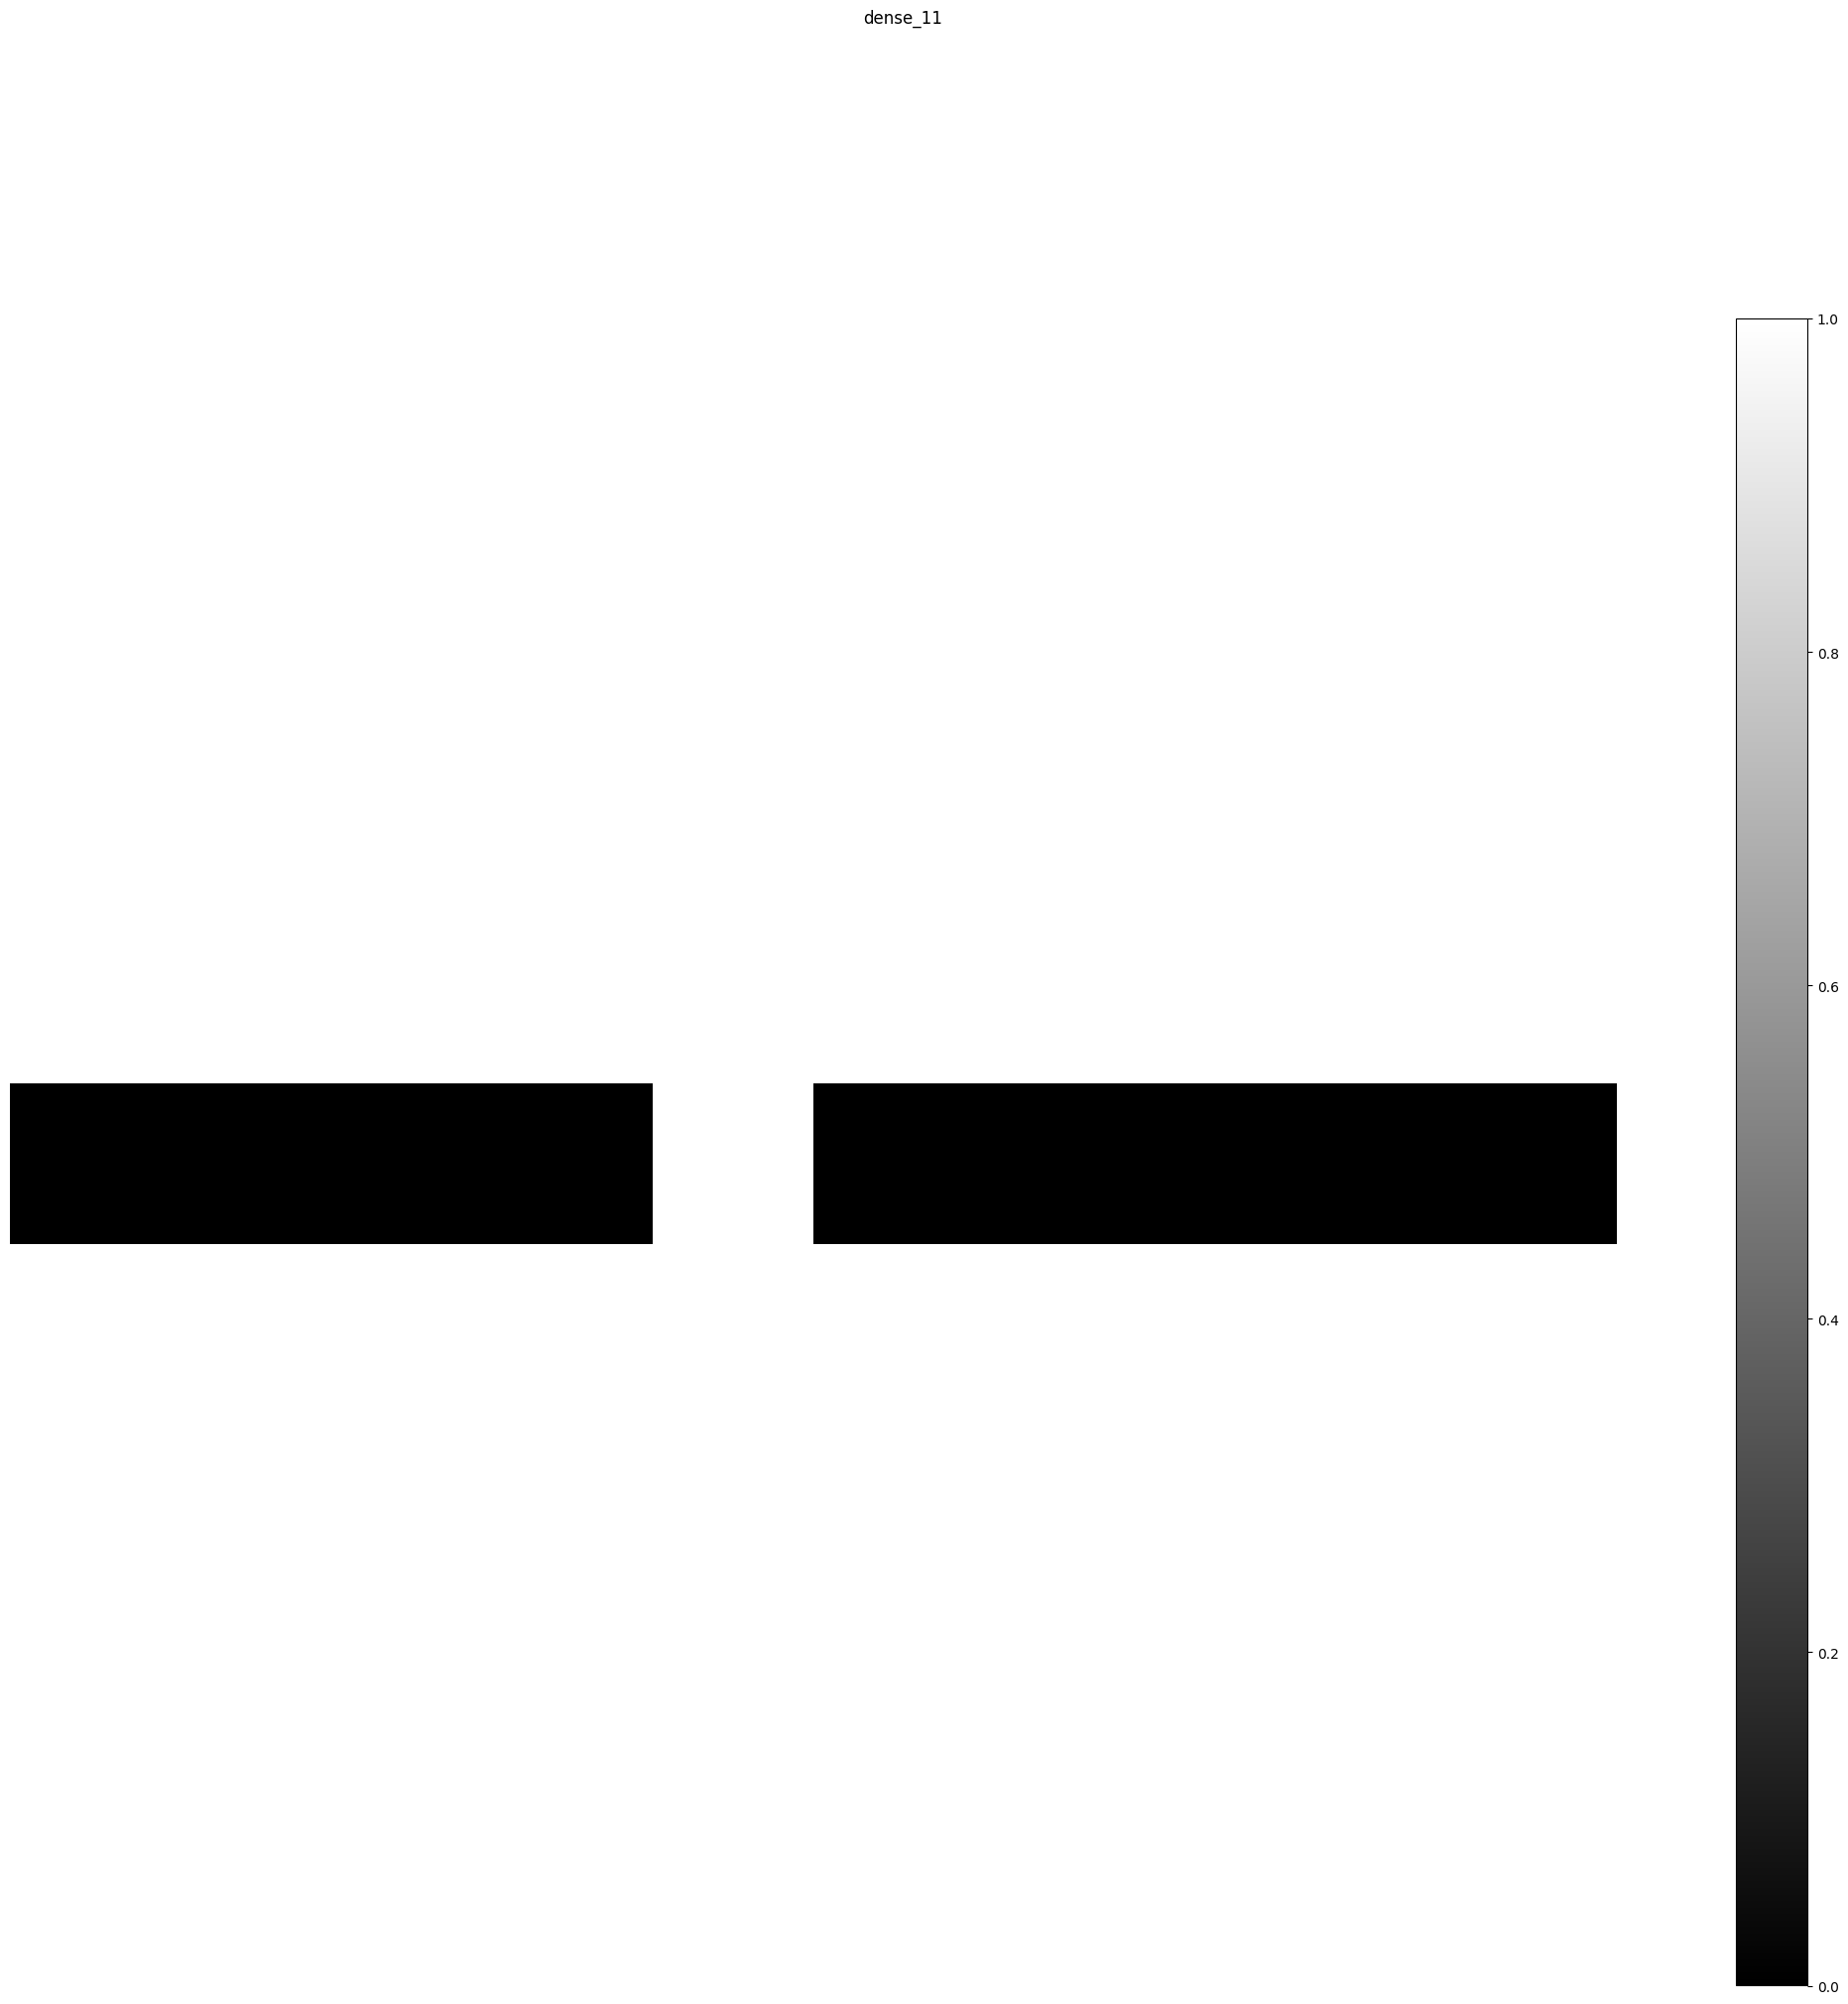

In [ ]:
import numpy
# Визуализируем активации с помощью keract.
# С помощью array slicing выделяем первый элемент из массива. (Результат должен также быть массивом.)
inputs = input_test[4:5:1]
#inputs = numpy.ones((1, 28, 28, 1))
activations = get_activations(model, inputs)
display_activations(activations, cmap="gray", save=False)